In [1]:
import cv2 as cv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
from dataset import Dataset
from utils import Utils

In [2]:
dataset = Dataset()
# from IPython.display import display, Image
plt.rcParams['figure.dpi'] = 400  # Example: Set DPI to 200
font = {'size'   : 3}

matplotlib.rc('font', **font)
s = lambda x: plt.imshow(x[:, :, ::-1]) if len(x.shape) == 3 else plt.imshow(x, cmap='gray')

In [3]:
def lerp_color(color1, color2, t):
    """
    Linearly interpolate between two colors.
    :param color1: The first color (BGR tuple).
    :param color2: The second color (BGR tuple).
    :param t: Interpolation factor (0.0 to 1.0).
    :return: Interpolated color (BGR tuple).
    """
    return tuple(int(c1 + (c2 - c1) * t) for c1, c2 in zip(color1, color2))


In [18]:
def smooth_contour(contour, epsilon=0.01):
    """
    Smooth a contour by rasterizing it, applying morphological operations, and re-approximating it.
    :param contour: The contour to smooth.
    :param epsilon: The dilation factor for smoothing.
    :return: Smoothed contour.
    """
    # Normalize contour 0 to max value - minvalue
    kernel_size = 151
    padding = kernel_size + 1
    old_area = cv.contourArea(contour)
    max_x = max(contour[:, 0, 1])
    max_y = max(contour[:, 0, 0])
    # Create a mask for the contour
    mask = np.zeros((max_x, max_y), dtype=np.uint8)
    # OPTIMIZATION: The image is larger than the contour, so we can use a smaller mask.
    cv.drawContours(mask, [contour], -1, 255, thickness=cv.FILLED)
    # Pad mask to avoid clipping
    mask = cv.copyMakeBorder(mask, padding, padding, padding, padding, cv.BORDER_CONSTANT, value=0)
    # Rasterize the contour
    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (kernel_size, kernel_size))
    # mask = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel)
    mask = cv.blur(mask, (kernel_size, kernel_size))
    mask = cv.morphologyEx(mask, cv.MORPH_ERODE, kernel)
    # Remove the border padding
    mask = mask[padding:-padding, padding:-padding]
    # Find contours in the mask
    contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    if contours:
        # Shift it back
        new_area = cv.contourArea(contours[-1])
        print(f"{old_area=}, {new_area=} {len(contours)}")
        return contours[-1]
    else:
        print("Failed to smooth :c")
        return contour  # Return original contour if no contours found


In [25]:
import cv2 as cv
import numpy as np

def smooth_contour(contour, kernel_size=151, epsilon=0.01):
    old_area = cv.contourArea(contour)

    # Compute tight bounding rectangle
    x, y, w, h = cv.boundingRect(contour)
    padding = kernel_size // 2 + 1

    # Create small mask based on bounding rect
    mask = np.zeros((h + 2 * padding, w + 2 * padding), dtype=np.uint8)

    # Shift contour to bounding rect coordinates
    shifted_contour = contour - [x - padding, y - padding]

    # Draw filled contour on the small mask
    cv.drawContours(mask, [shifted_contour], -1, 255, thickness=cv.FILLED)

    # Efficient smoothing operation
    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (kernel_size, kernel_size))
    mask = cv.blur(mask, (kernel_size, kernel_size))
    mask = cv.morphologyEx(mask, cv.MORPH_ERODE, kernel)

    # Find contours on the processed mask
    contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    if contours:
        new_contour = contours[0] + [x - padding, y - padding]
        new_area = cv.contourArea(new_contour)
        print(f"Old area: {old_area}, New area: {new_area}, Number of contours found: {len(contours)}")
        return new_contour
    else:
        print("Failed to smooth.")
        return contour


In [34]:
good = [34, 35, 37, 38, 60, 80, 83]
image_path = dataset.images[80]
image = cv.imread(image_path)
# s(image[:, :, ::-1])

(35, 1, 2) 185.5
(52, 1, 2) 693.0
(46, 1, 2) 998.5
(608, 1, 2) 16716.0
(57, 1, 2) 1073.0
(1197, 1, 2) 40577.5
Old area: 40577.5, New area: 49965.0, Number of contours found: 1
(421, 1, 2) 11500.5
(2, 1, 2) 0.0
(54, 1, 2) 990.0
(352, 1, 2) 9038.5
(1040, 1, 2) 78449.0
Old area: 78449.0, New area: 85348.0, Number of contours found: 1
(694, 1, 2) 34042.5
Old area: 34042.5, New area: 41256.5, Number of contours found: 1
(1103, 1, 2) 47290.0
Old area: 47290.0, New area: 55513.0, Number of contours found: 1
(56, 1, 2) 1077.0
(56, 1, 2) 1026.0
(60, 1, 2) 1139.0
(54, 1, 2) 990.0
(56, 1, 2) 1026.0
(54, 1, 2) 990.0
(54, 1, 2) 990.0
(56, 1, 2) 1026.0
(56, 1, 2) 1062.0
(56, 1, 2) 1062.0
(60, 1, 2) 1106.0
(62, 1, 2) 1237.5
(56, 1, 2) 1062.0
(125, 1, 2) 2773.0
(58, 1, 2) 1069.0
(84, 1, 2) 1856.0
(54, 1, 2) 990.0
(75, 1, 2) 1495.0
(54, 1, 2) 990.0
(57, 1, 2) 1073.0
(1066, 1, 2) 47982.5
Old area: 47982.5, New area: 55722.5, Number of contours found: 1
(1286, 1, 2) 200059.5
Old area: 200059.5, New area:

,index,area,rect_area,side_rating,aspect_ratio,overall_rating,ratio_rating,ratio
16,86,3674718.5,3743120.0,0.027789,1.424851,0.019213,0.010638,0.981726
14,84,3801296.5,3829744.5,0.037647,1.389741,0.031060,0.024472,0.992572
15,85,3877018.5,3939992.0,0.025139,1.369950,0.034701,0.044263,0.984017
3,12,55513.0,86205.0,0.742501,1.536351,0.432319,0.122137,0.643965
4,33,55722.5,83232.0,0.727964,1.655018,0.484385,0.240805,0.669484
10,74,472712.5,487634.5,0.016912,2.872675,0.737687,1.458462,0.969399
2,11,41256.5,54579.0,1.553624,1.848684,0.994047,0.434471,0.755904
13,80,337031.5,387646.5,0.089662,3.509189,1.092319,2.094976,0.869430
12,79,250024.5,304857.0,0.087224,4.015184,1.344097,2.600970,0.820137
1,10,85348.0,97830.0,0.033731,5.708594,2.164056,4.294380,0.872411


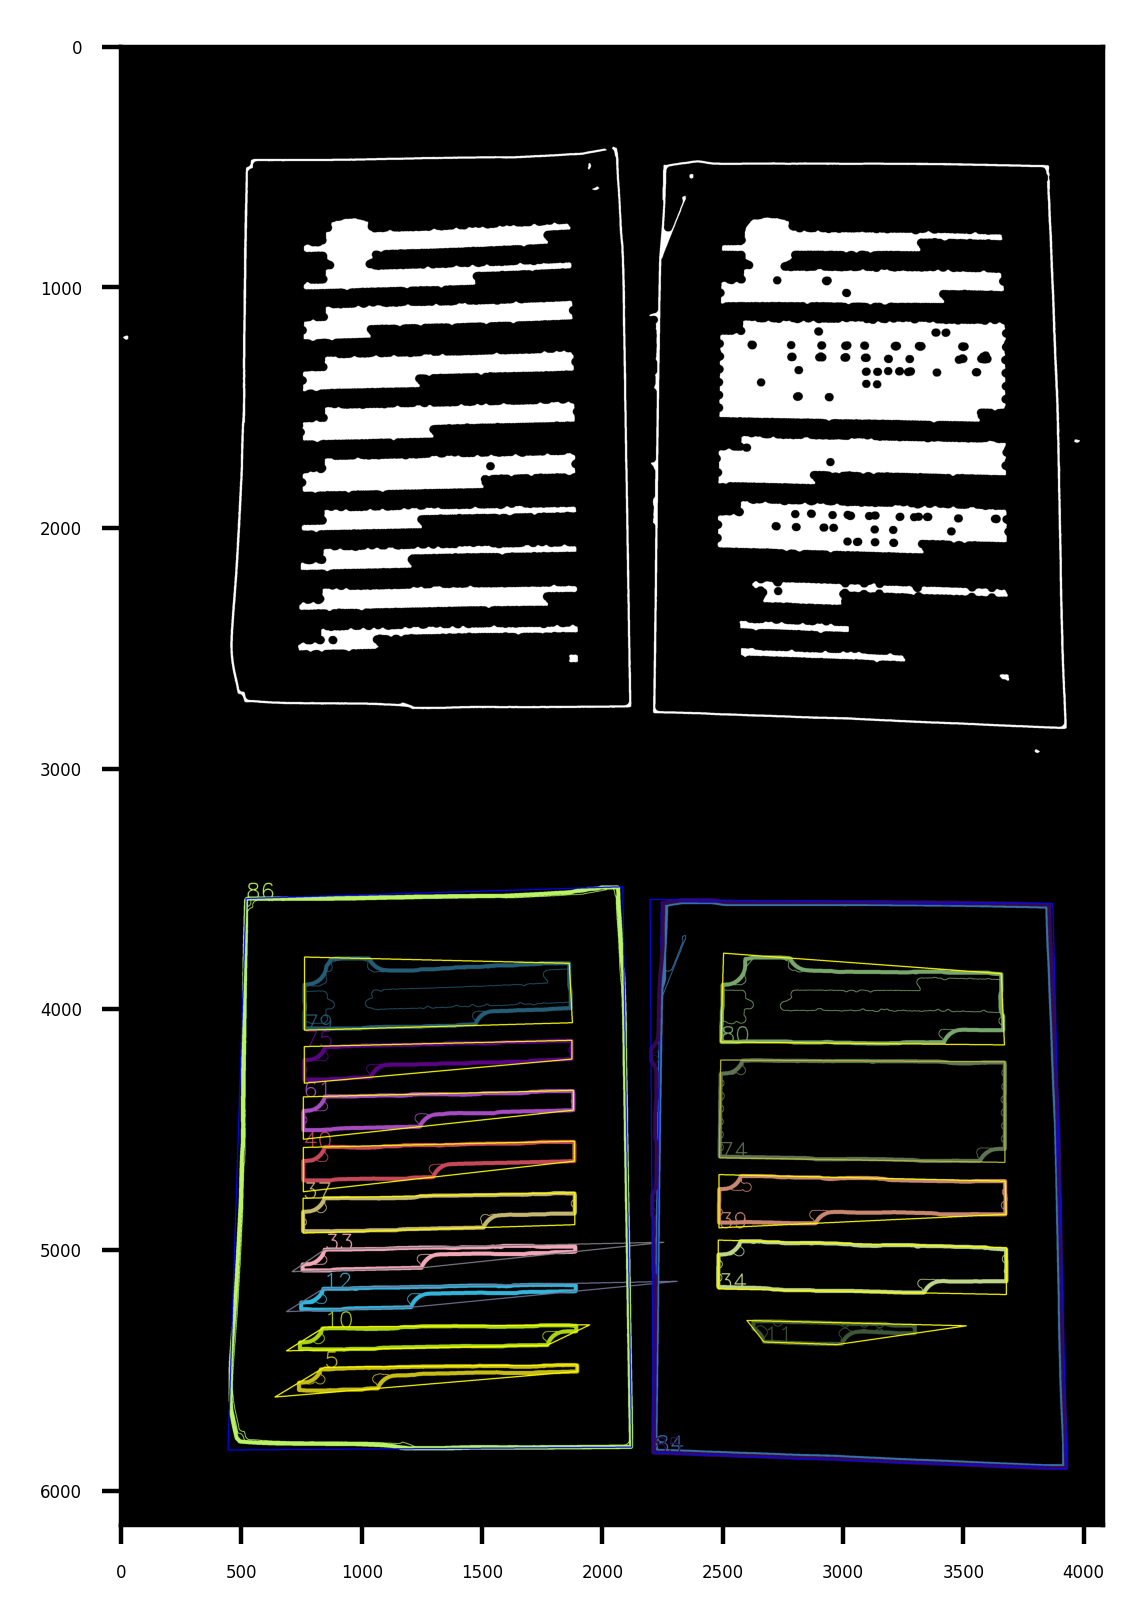

In [35]:
from IPython.display import Image, display
%matplotlib inline

def color_map(idx: int) -> tuple:
    """
    Generate a color map for the given index.
    :param idx: The index to generate the color map for.
    :return: A tuple representing the color in BGR format.
    """
    if idx == 0:
        return (255, 255, 255)  # White for background
    # Interpolate colors between blue and red for the first 10 indices
    elif idx < 5:
        blue = int(255 * (1 - idx / 5))
        red = int(255 * (idx / 5))
        return (blue, 0, red)  # BGR format
    else:
        # For indices >= 10, use a fixed color
        return (0, 0, 0)  # Green for other components


blurred = cv.GaussianBlur(image, (5, 5), 0)
# Apply morphological gradient
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
gradient = cv.morphologyEx(blurred, cv.MORPH_GRADIENT, kernel)
gray_gradient = cv.cvtColor(gradient, cv.COLOR_BGR2GRAY)
canny = cv.Canny(gray_gradient, 50, 200)
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
canny = cv.morphologyEx(canny, cv.MORPH_DILATE, kernel)
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (35, 35))
canny = cv.morphologyEx(canny, cv.MORPH_CLOSE, kernel)

# Connected components doesn't work great because of nested components, E.G. the text.

# Do contour detection on `canny`
df = []
contours, hierarchy = cv.findContours(canny, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
contour_render = np.zeros_like(image)
for i, contour in enumerate(contours):
    col = np.random.randint(0, 255, size=(3,), dtype=np.uint8)
    area = cv.contourArea(contour)
    print(contour.shape, area)
    if area < 150 * 150:
        continue  # Skip small contours
    new_contour = smooth_contour(contour)
    if new_contour is contour:
        print(f"Failed to smooth contour {i}, area: {area}")
    contour = new_contour
    area = cv.contourArea(contour)
    if area < 100 * 100:
        continue  # Skip small contours
    cv.drawContours(contour_render, contours, i, col.tolist(), 2)
    cv.drawContours(contour_render, [contour], -1, col.tolist(), 16)
    # Approximate the contour to a polygon
    approx = cv.approxPolyN(contour, 4)
    # Draw the approximated polygon
    approximation_area = cv.contourArea(approx)
    approx_side_lengths = [np.linalg.norm(approx[0][j] - approx[0][(j + 1) % len(approx[0])]) for j in range(len(approx[0]))]
    side_a_len = approx_side_lengths[0] + approx_side_lengths[2]
    side_b_len = approx_side_lengths[1] + approx_side_lengths[3]
    # Add text with contour index

    cv.putText(contour_render, str(i), tuple(approx[0][2]), cv.FONT_HERSHEY_SIMPLEX, 3, col.tolist(), 3)
    side_a_ratio = approx_side_lengths[0] / approx_side_lengths[2] if approx_side_lengths[2] != 0 else 0
    side_b_ratio = approx_side_lengths[1] / approx_side_lengths[3] if approx_side_lengths[3] != 0 else 0
    aspect_ratio = side_a_len / side_b_len if side_b_len != 0 else 0
    if aspect_ratio < 1:
        aspect_ratio = 1 / aspect_ratio  # Ensure aspect ratio is >= 1
    ratio_rating = abs((2 ** 0.5) - aspect_ratio)
    side_rating = abs(1 - (side_a_ratio + side_b_ratio) / 2)
    overall_rating = (ratio_rating + side_rating) / 2
    cv.drawContours(contour_render, [approx], -1, lerp_color((255,0,0), (0,255,255), overall_rating), 4)
    df.append({
        'index': i,
        'area': area,
        'rect_area': approximation_area,
        # 'side_a': side_a_len,
        # 'side_b': side_b_len,
        # 'side_a_ratio': side_a_ratio,
        # 'side_b_ratio': side_b_ratio,
        'side_rating': side_rating,
        'aspect_ratio': aspect_ratio,
        'overall_rating': overall_rating
    })

s(cv.vconcat([cv.cvtColor(canny, cv.COLOR_GRAY2BGR), contour_render]))
df = pd.DataFrame(df)
df['ratio_rating'] = abs((2 ** 0.5) - df['aspect_ratio'])
df['ratio'] = df['area'] / df['rect_area']
pd.set_option('display.max_rows', 500)
df.sort_values(by=['overall_rating'], ascending=True)

old_area=221114.5, new_area=57901.0 1


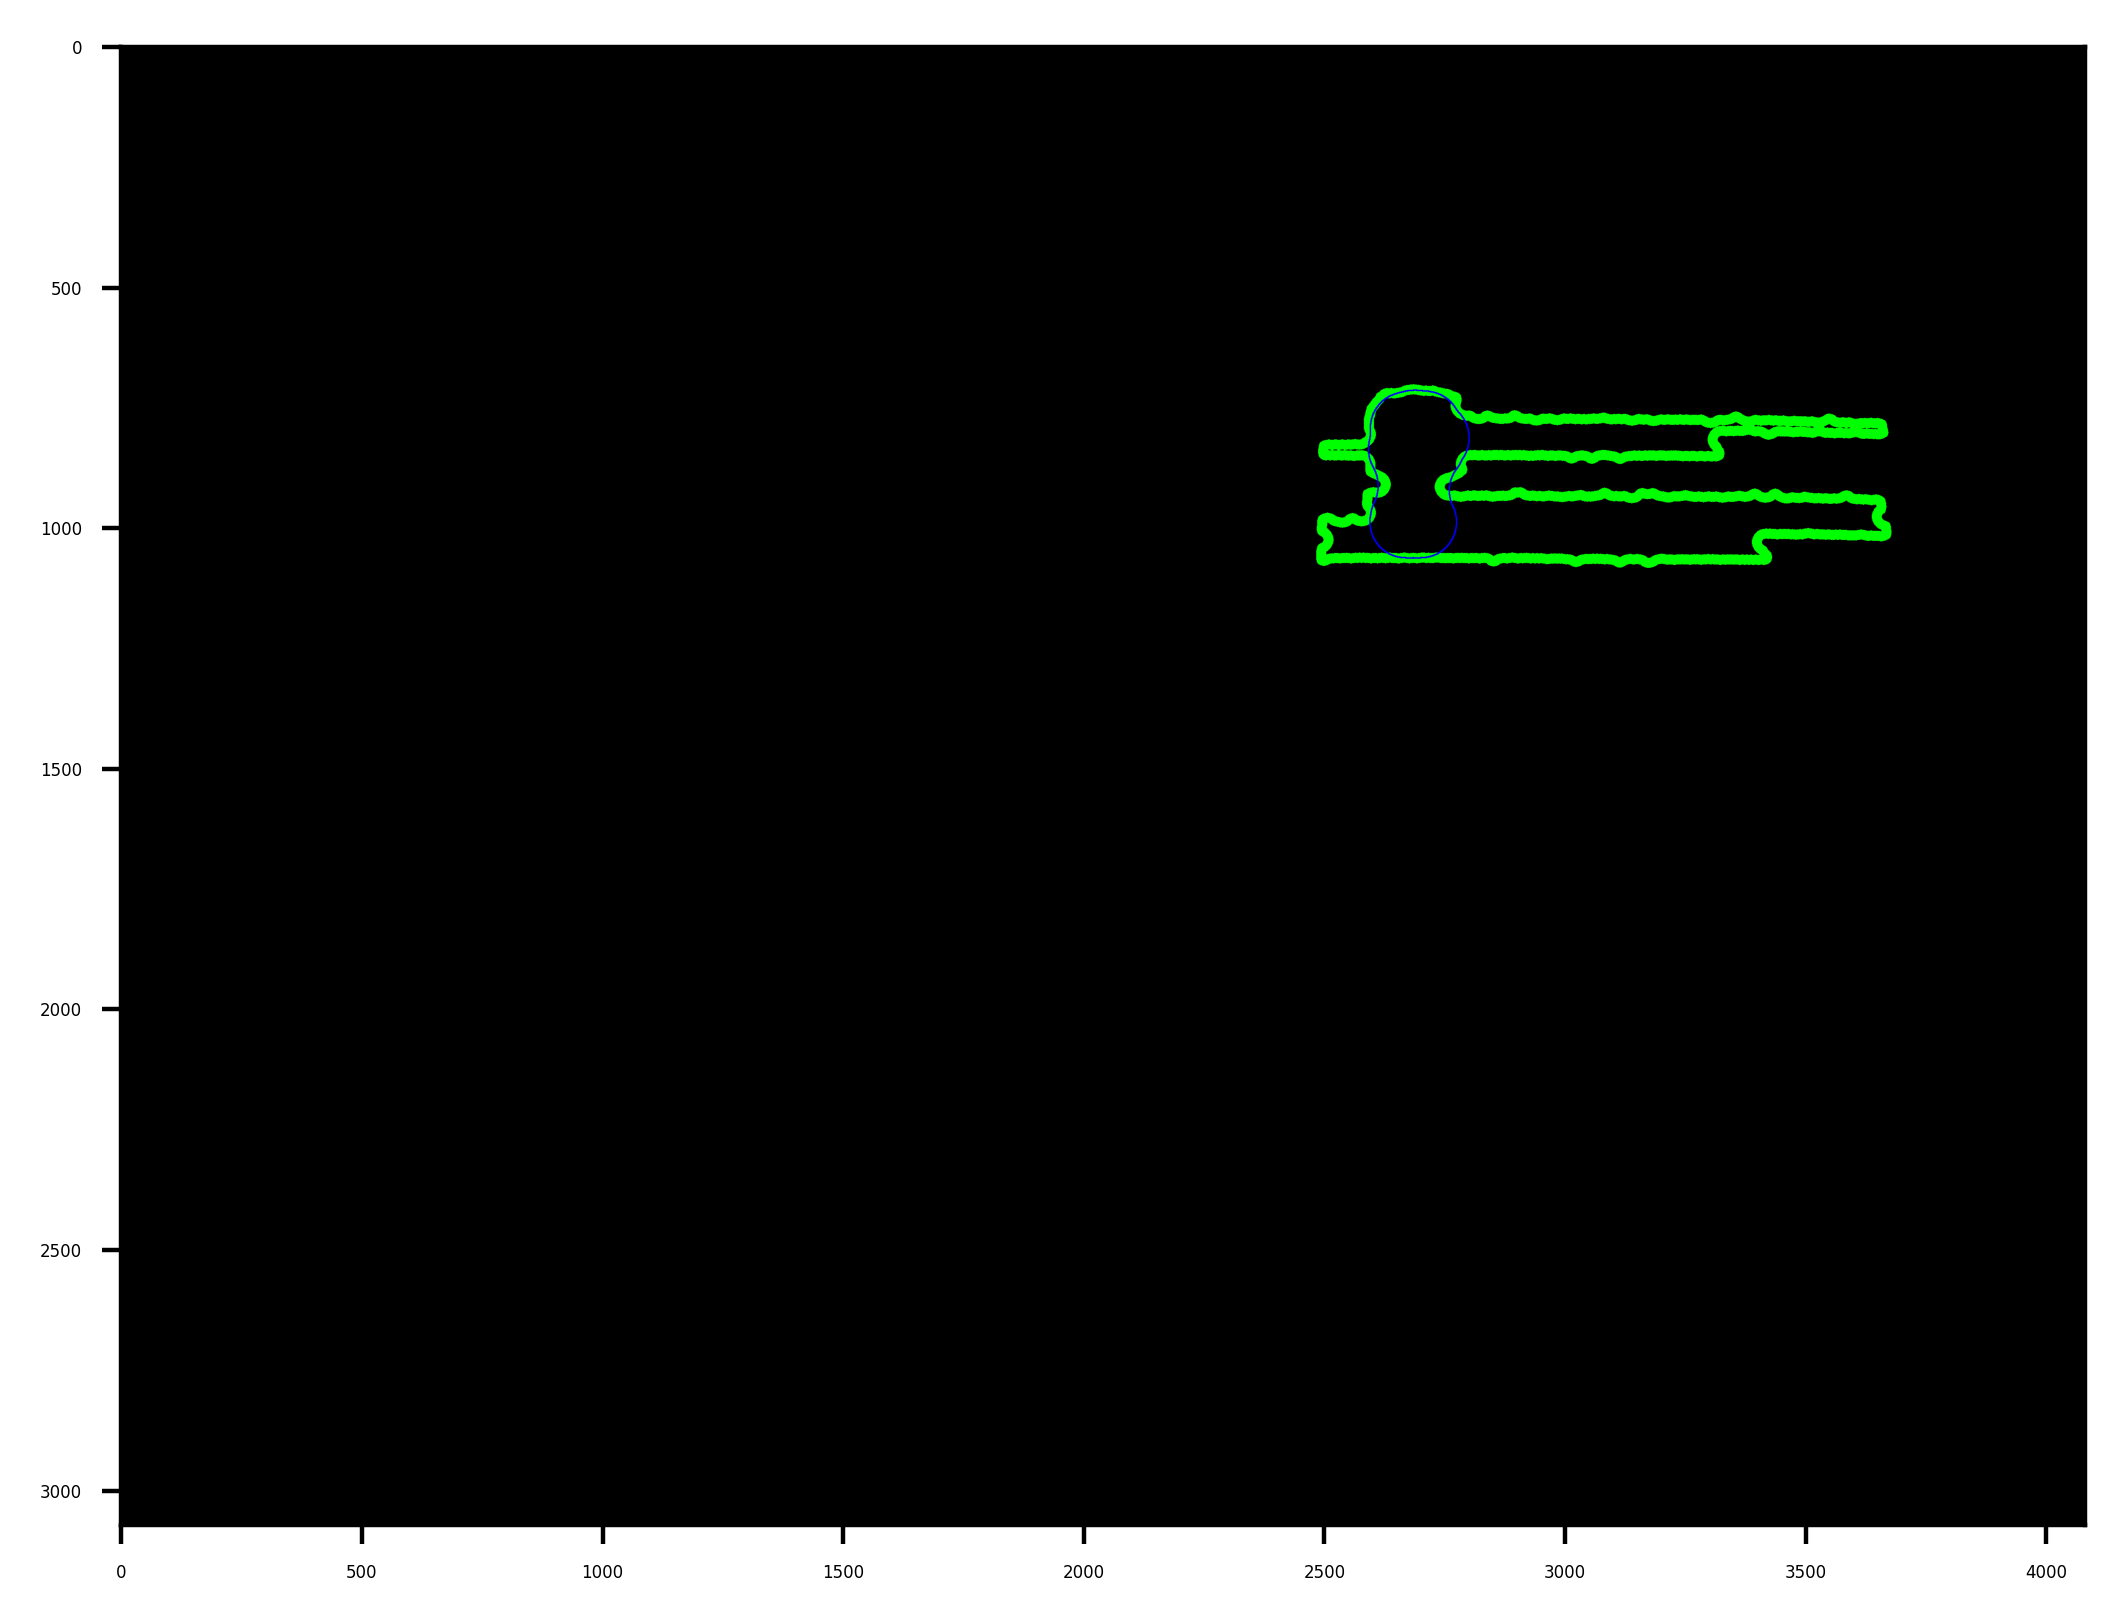

In [7]:
# detect contours in the image
contours, hierarchy = cv.findContours(canny, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
# draw contours on the original image
contour_render = np.zeros_like(image)
i = 80
cv.drawContours(contour_render, contours, i, (0, 255, 0), 20)
smooth = smooth_contour(contours[i], epsilon=1)
cv.drawContours(contour_render, [smooth], 0, (255, 0, 0), 2)

s(cv.vconcat([contour_render]))

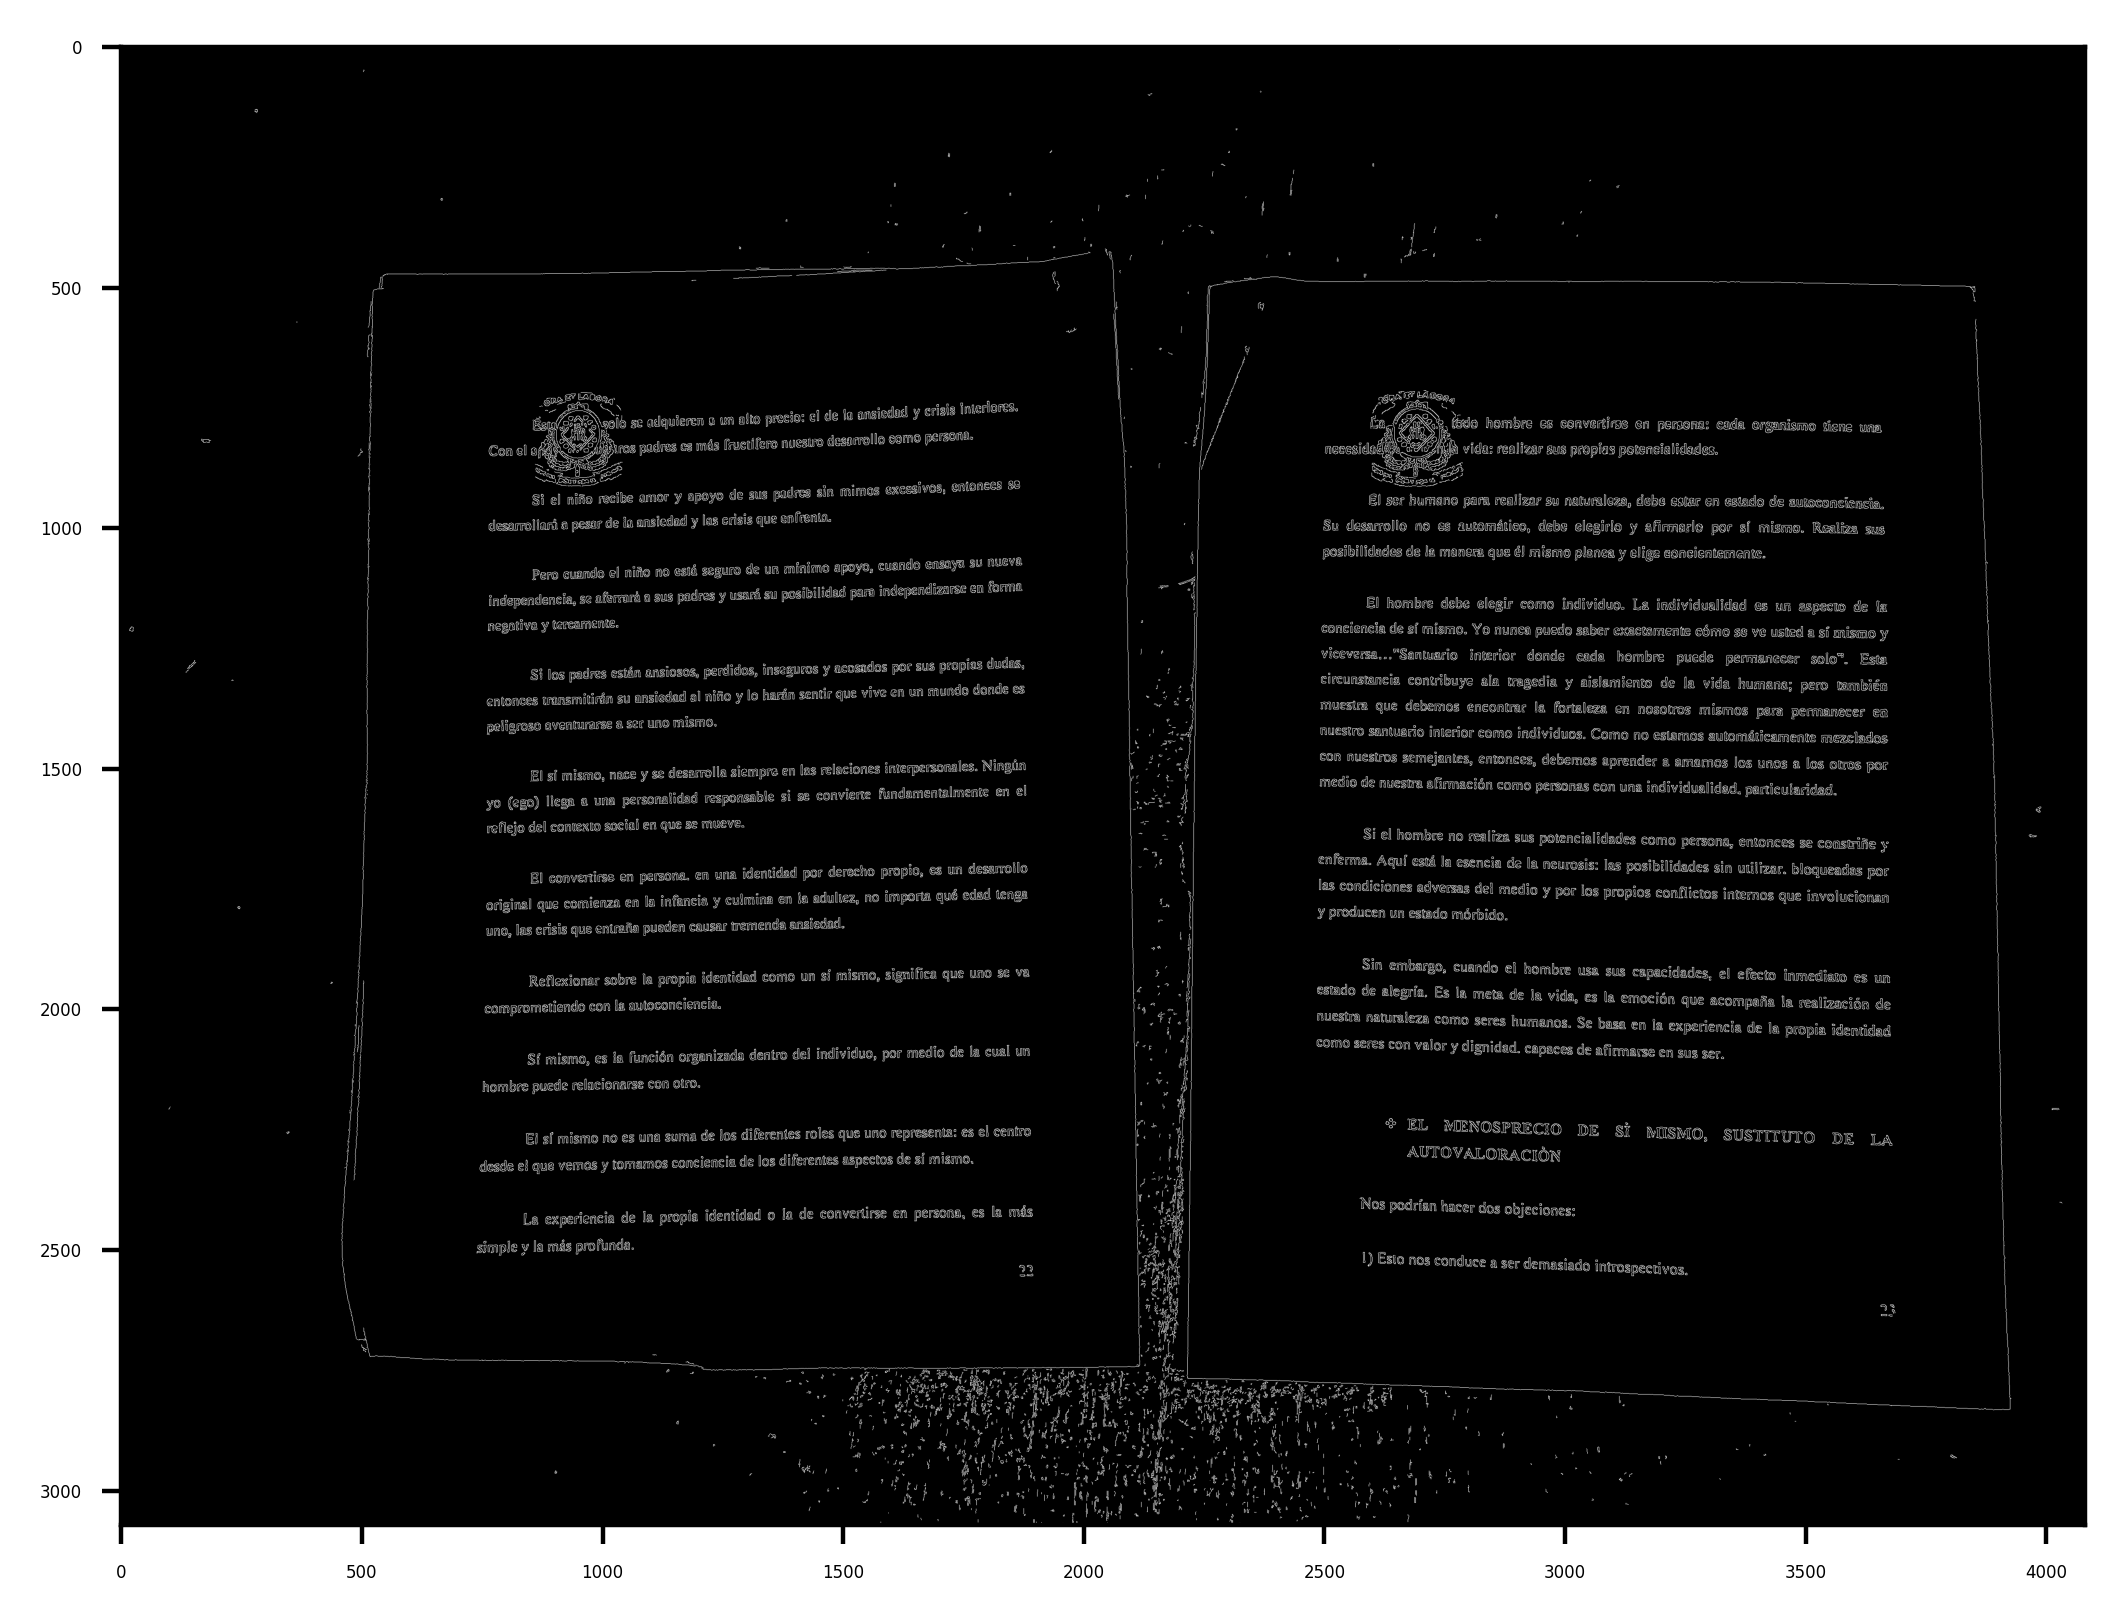

In [8]:
canny = cv.Canny(image, 100, 200)
s(canny)

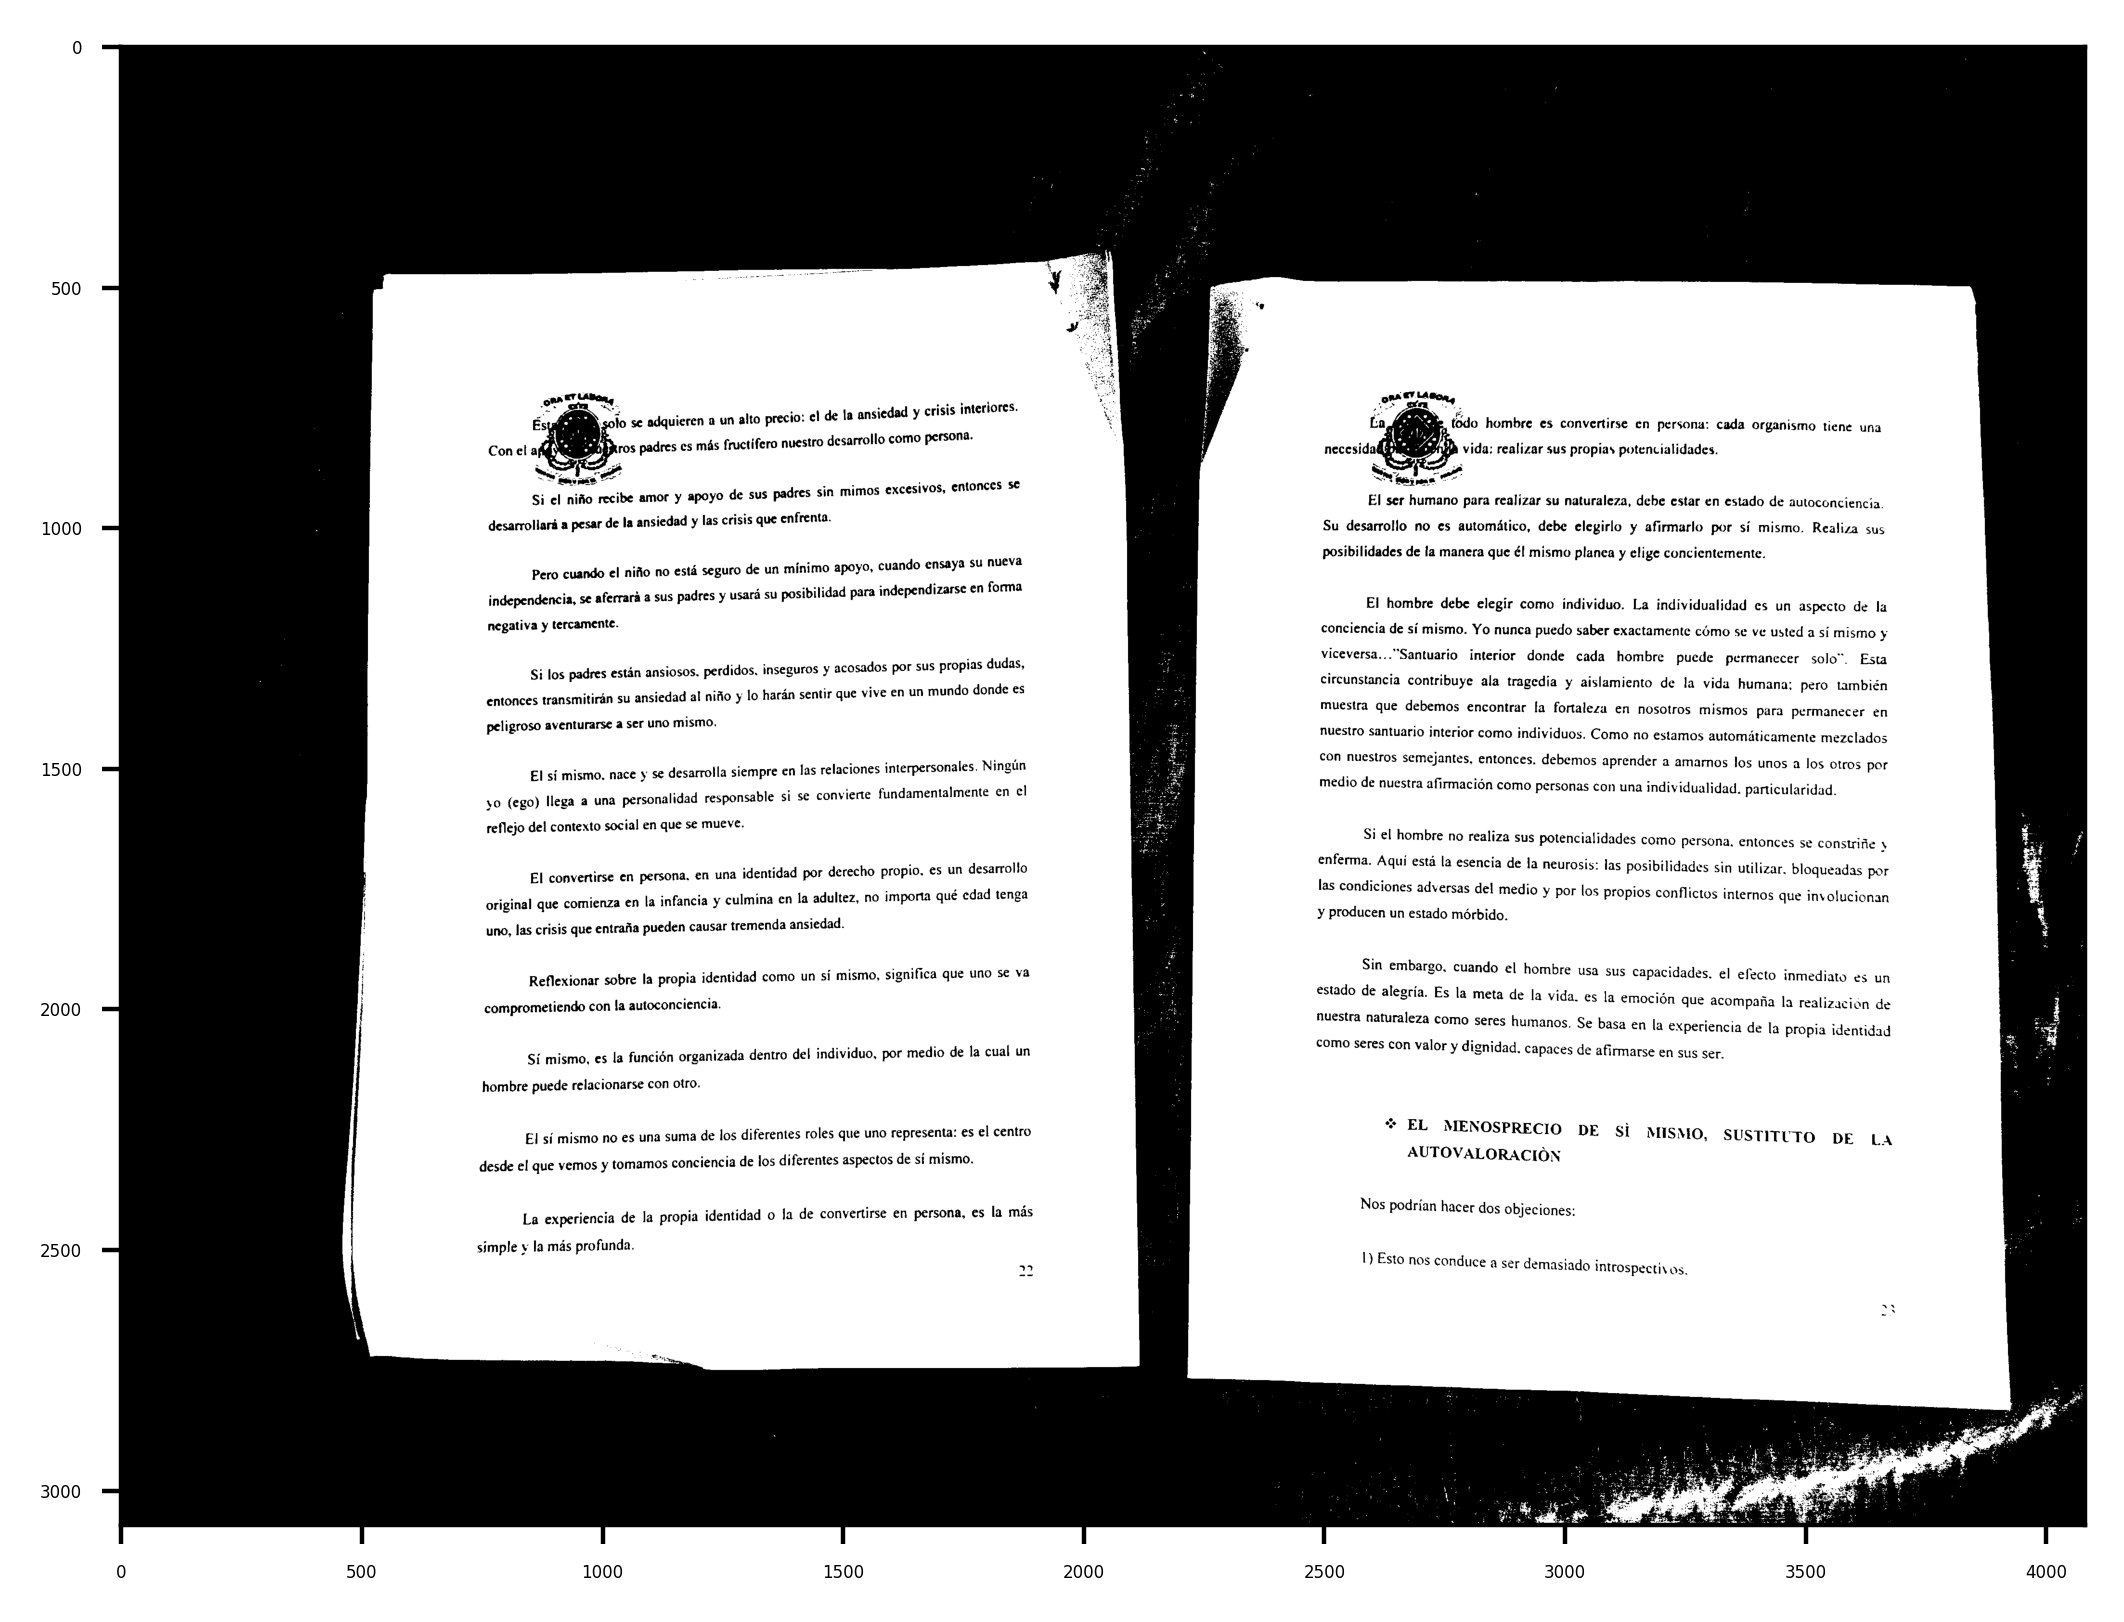

In [9]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

_, binary_image = cv.threshold(gray_image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
s(gray_image)
s(binary_image)

-1 2147483647 0 0 0
0 0 4080 3072 12533760


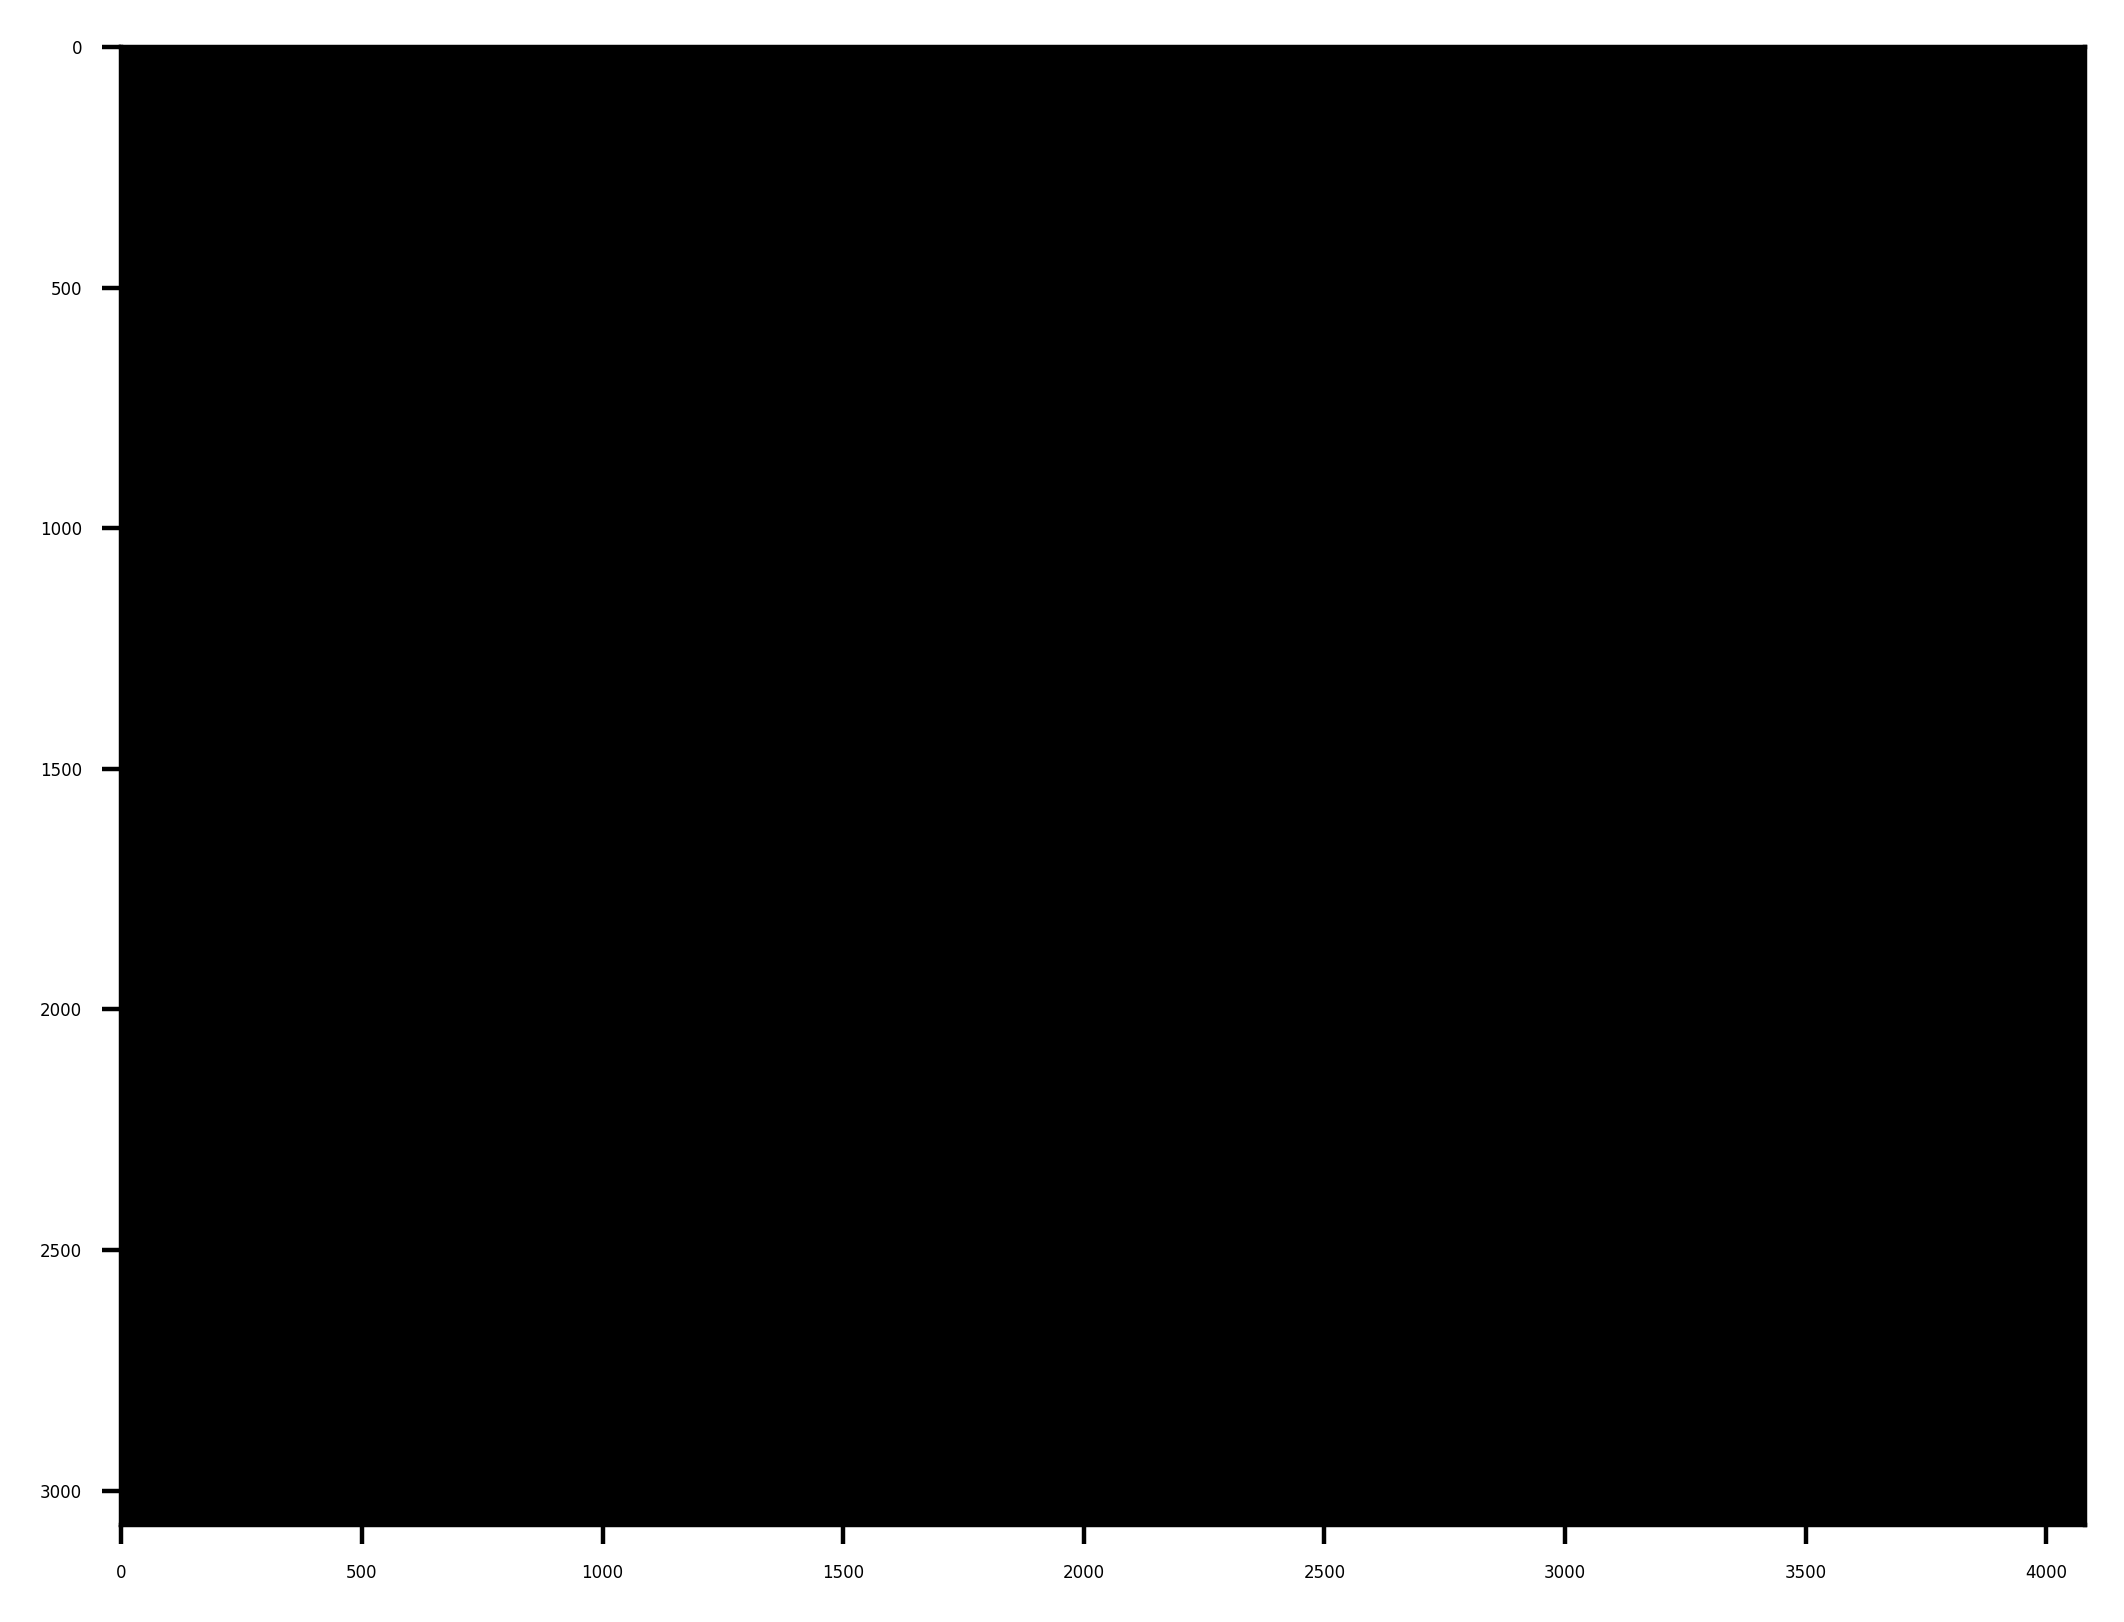

In [10]:
components, labels, stats, centroids = cv.connectedComponentsWithStats(gray_image)

for i in range(0, components):
    x, y, w, h, area = stats[i]
    print(x, y, w, h, area)

s(labels)